In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

In [21]:
folder_path = 'closest_points'

window_lengths = {
    'cluster_0_closest_points.csv': 7,
    'cluster_1_closest_points.csv': 12,
    'cluster_2_closest_points.csv': 8,
}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


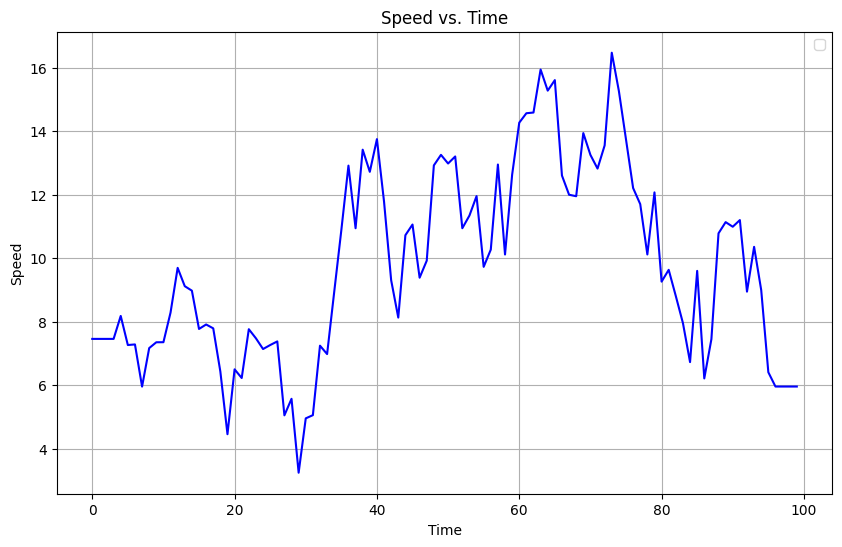

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


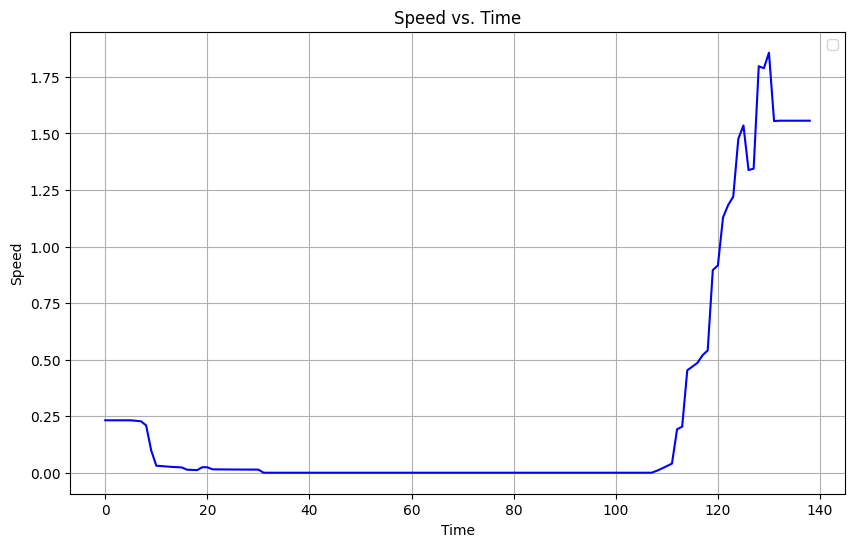

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


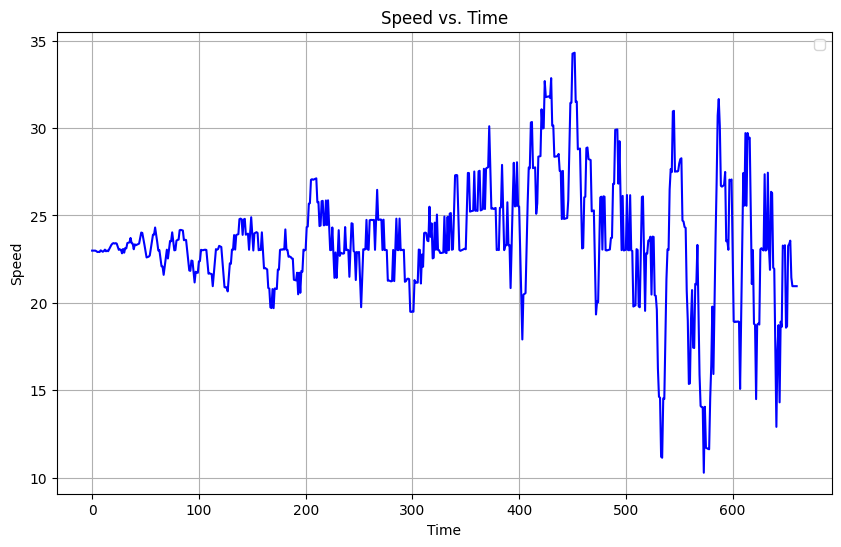

In [22]:
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

for csv_file in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    data = pd.read_csv(file_path)

    avg_speed = data['avg speed'].values

    window_length = window_lengths.get(csv_file, 30)

    smoothed_avg_speed = savgol_filter(avg_speed, window_length=window_length, polyorder=0)

    smoothed_avg_speed = np.maximum(smoothed_avg_speed, 0)

    plt.figure(figsize=(10, 6))
    plt.plot(range(len(data)), smoothed_avg_speed, color='blue')
    plt.xlabel('Time')
    plt.ylabel('Speed')
    plt.title(f'Speed vs. Time')
    plt.legend()
    plt.grid(True)
    plt.show()

In [23]:
import os
import pandas as pd

input_folder = 'closest_points'  # Replace with the path to your folder containing CSV files
output_file = 'combined_data.csv'  # Replace with the desired output file name

# Get a list of all CSV files in the input folder
csv_files = [file for file in os.listdir(input_folder) if file.endswith('.csv')]

# Initialize an empty list to store DataFrames
dfs = []

# Iterate through each CSV file and append its rows to the dfs list
for csv_file in csv_files:
    file_path = os.path.join(input_folder, csv_file)
    data = pd.read_csv(file_path)
    dfs.append(data)

# Concatenate all DataFrames in the list into a single DataFrame
combined_data = pd.concat(dfs, ignore_index=True)

# Save the combined data to a new CSV file
combined_data.to_csv(output_file, index=False)

print(f"Combined data saved to {output_file}")



Combined data saved to combined_data.csv


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


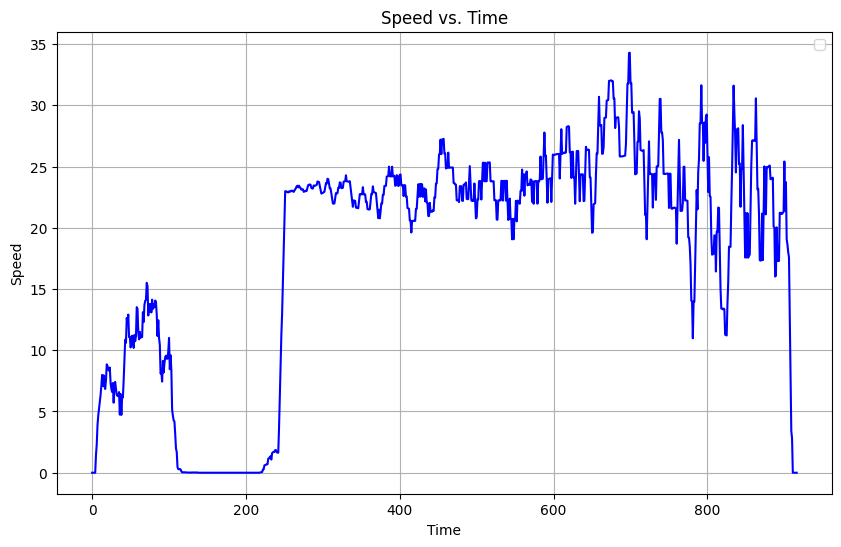

In [3]:
data = pd.read_csv('combined_data.csv')

avg_speed = data['avg speed'].values

smoothed_avg_speed = savgol_filter(avg_speed, window_length=9, polyorder=0)

smoothed_avg_speed = np.maximum(smoothed_avg_speed, 0)

plt.figure(figsize=(10, 6))
plt.plot(range(len(data)), smoothed_avg_speed, color='blue')
plt.xlabel('Time')
plt.ylabel('Speed')
plt.title(f'Speed vs. Time')
plt.legend()
plt.grid(True)
plt.show()